In [207]:
import pandas as pd
import numpy as np

In [208]:
df1 = pd.read_csv('../small1/labeled.csv')
df2 = pd.read_csv('../small2/labeled.csv')
df3 = pd.read_csv('../small3/labeled.csv')

In [209]:
df = pd.concat([df1, df2, df3])
df.shape

(75022, 4)

In [210]:
df.head()

,title,is_clickbait,text,dataset
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,fake-news
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,Ever get the feeling your life circles the rou...,fake-news
2,Why the Truth Might Get You Fired,1,"Why the Truth Might Get You Fired October 29, ...",fake-news
3,15 Civilians Killed In Single US Airstrike Hav...,1,Videos 15 Civilians Killed In Single US Airstr...,fake-news
4,Iranian woman jailed for fictional unpublished...,1,Print \nAn Iranian woman has been sentenced to...,fake-news


In [211]:
# drop empty titles
df = df[df['title'].notna()]

In [212]:
df['dataset'].value_counts()

dataset
clickbait-dataset           32000
clickbait-news-detection    22780
fake-news                   20242
Name: count, dtype: int64

In [213]:
duplicate_rows = df[df.duplicated(subset='title', keep=False)]
duplicate_rows.shape

(1667, 4)

In [214]:
grouped_dups = duplicate_rows.groupby('title').agg({'is_clickbait': 'unique'}).reset_index()
grouped_dups

,title,is_clickbait
0,"""Top Five Clinton Donors Are Jewish"" - How Ant...",[1]
1,$20 Billion in Tax Credits Fails to Increase C...,[0]
2,'Grand slam!' Father-son film is smash hit for...,[1]
3,'Hollywood' sign changed to 'Hollyweed' in new...,[0]
4,10 things you need to know before the opening ...,"[1, 0]"
...,...,...
764,"“If Trump Loses, I’m Grabbing My Musket”: Form...",[1]
765,“Nothing Good Can Come of This Election”–and T...,[1]
766,“Rigged To Deny Trump”: Are They Stealing Thes...,[1]
767,“They Got In There And Totally Took It Over” –...,[1]


In [215]:
grouped_dups['is_clickbait_is_same'] = grouped_dups['is_clickbait'].apply(lambda x: len(x) == 1)
grouped_dups['is_clickbait_is_same'].value_counts()

is_clickbait_is_same
True     722
False     47
Name: count, dtype: int64

In [216]:
# drop articles with conflicting labels
df = df[~df['title'].isin(grouped_dups[grouped_dups['is_clickbait_is_same'] == False]['title'])]
df.shape

(74874, 4)

In [217]:
# drop duplicate titles
df = df.drop_duplicates(subset='title')
df.shape

(74077, 4)

In [218]:
df['dataset'].value_counts()

dataset
clickbait-dataset           32000
clickbait-news-detection    22299
fake-news                   19778
Name: count, dtype: int64

In [219]:
df = df.reset_index(drop=True)
df

,title,is_clickbait,text,dataset
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,fake-news
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,Ever get the feeling your life circles the rou...,fake-news
2,Why the Truth Might Get You Fired,1,"Why the Truth Might Get You Fired October 29, ...",fake-news
3,15 Civilians Killed In Single US Airstrike Hav...,1,Videos 15 Civilians Killed In Single US Airstr...,fake-news
4,Iranian woman jailed for fictional unpublished...,1,Print \nAn Iranian woman has been sentenced to...,fake-news
...,...,...,...,...
74072,"To Make Female Hearts Flutter in Iraq, Throw a...",0,NaN,clickbait-dataset
74073,"British Liberal Democrat Patsy Calton, 56, die...",0,NaN,clickbait-dataset
74074,Drone smartphone app to help heart attack vict...,0,NaN,clickbait-dataset
74075,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,NaN,clickbait-dataset


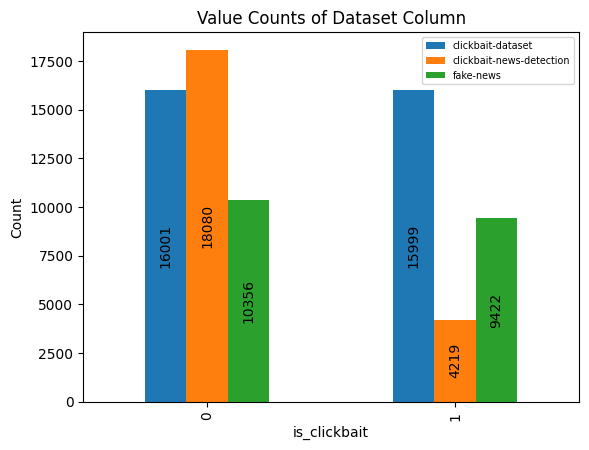

In [220]:
import matplotlib.pyplot as plt
grouped = df.groupby(['is_clickbait', 'dataset']).size().unstack()
# Plot the grouped data
ax = grouped.plot(kind='bar', stacked=False)

# Set the plot title and labels
plt.title('Value Counts of Dataset Column')
plt.xlabel('is_clickbait')
plt.ylabel('Count')

# Make the legend smaller
ax.legend(fontsize='x-small')

# Add text to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() / 2), ha='center', va='center', rotation=90)

# Show the plot
plt.show()


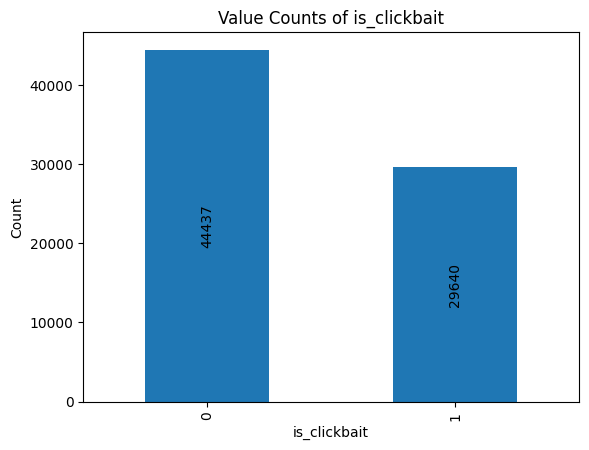

In [221]:
import matplotlib.pyplot as plt

# Plot the value counts of is_clickbait
ax = df['is_clickbait'].value_counts().plot(kind='bar')

# Set the plot title and labels
plt.title('Value Counts of is_clickbait')
plt.xlabel('is_clickbait')
plt.ylabel('Count')

# Add text to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() / 2), ha='center', va='center', rotation=90)

# Show the plot
plt.show()


In [222]:
temp = df.groupby('title').agg({'is_clickbait': 'unique'}).reset_index()
temp['is_clickbait'].value_counts()

is_clickbait
[0]    44437
[1]    29640
Name: count, dtype: int64

In [223]:
# assign train and test sets stratified by is_clickbait

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, stratify=df['is_clickbait'])

train['sample'] = 'train'
test['sample'] = 'test'

df = pd.concat([train, test])

In [224]:
df.to_csv('../../modelling/data/merged_titles_labels.csv', index=False)